In [1]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline

In [2]:
import os

In [3]:
import sys 
sys.path.append('../')

In [4]:
import pandas as pd 
import numpy as np

In [5]:

import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from tqdm import tqdm
from torch import optim
 
from torch.utils.tensorboard import SummaryWriter


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
from src.models.rmt.CleanseMatrix import CleanseMatrix

In [8]:
from src.models.diffusion.ddpm import ScoreNet, DDPM, train_ddpm
from src.models.flow_matching.base import FlowMatchingModel

In [9]:
from src.models.rmt.utils import correlation2covariance

In [10]:
from src.datasets import build_block_matrix, build_true_matrix
from src.datasets import simulate_covariance_mean

In [11]:
from src.models.mvo.maximum_sharpe import get_maximum_sharpe_portfolio_weights
from src.models.mvo.minimum_variance import get_minimum_variance_portfolio_weights

In [12]:
from research.plots import qqplot, qqplot_against_normal, plot_results


In [13]:
device = "cpu" #if torch.cuda.is_available() else "cpu"


In [14]:
number_blocks, block_size, block_correlation = 5,10, 0.25

In [15]:

np.random.seed(0)
true_mu,true_covariance=build_true_matrix(number_blocks = number_blocks,
                                              block_size = block_size ,
                                              block_correlation = block_correlation)

In [16]:
maxsharpe_true_w=get_maximum_sharpe_portfolio_weights(true_covariance, true_mu) 

In [17]:
number_observations = 1000
shrink =  False
number_simulations = 10

In [18]:
simulated_data_cov_cond_number = []
generated_data_cov_cond_number = []
generated_data_error = []
mp_cond_number = []
mp_error  = []

fm_generated_data_cov_cond_number = []
fm_generated_data_error = []

fm_mp_generated_data_cov_cond_number = []
fm_mp_generated_data_error = []


ddpm_mp_generated_data_error = []

ddpm_mp_generated_data_cov_cond_number = []

Model has 178162 parameters

Training DDPM...
Epoch 100/1500, Loss: 0.0648
Epoch 200/1500, Loss: 0.0562
Epoch 300/1500, Loss: 0.0560
Epoch 400/1500, Loss: 0.0460
Epoch 500/1500, Loss: 0.0464
Epoch 600/1500, Loss: 0.0405
Epoch 700/1500, Loss: 0.0322
Epoch 800/1500, Loss: 0.0371
Epoch 900/1500, Loss: 0.0339
Epoch 1000/1500, Loss: 0.0366
Epoch 1100/1500, Loss: 0.0323
Epoch 1200/1500, Loss: 0.0373
Epoch 1300/1500, Loss: 0.0350
Epoch 1400/1500, Loss: 0.0426
Epoch 1500/1500, Loss: 0.0392


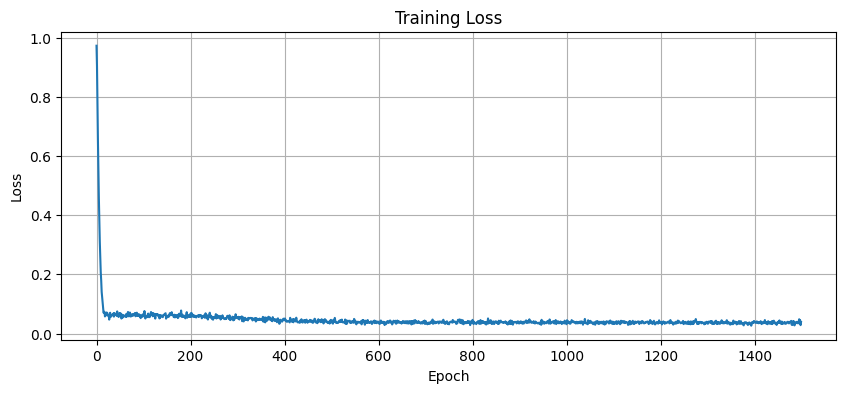


Generating samples...


Sampling: 4000it [00:08, 478.12it/s]


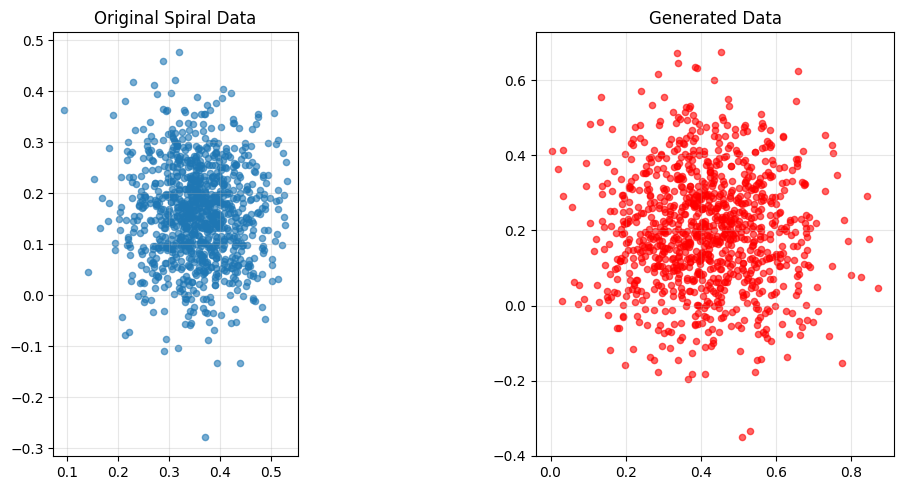


=== Statistics ===
Original - Mean: 0.122, Std: 0.415
Generated - Mean: 0.126, Std: 0.426


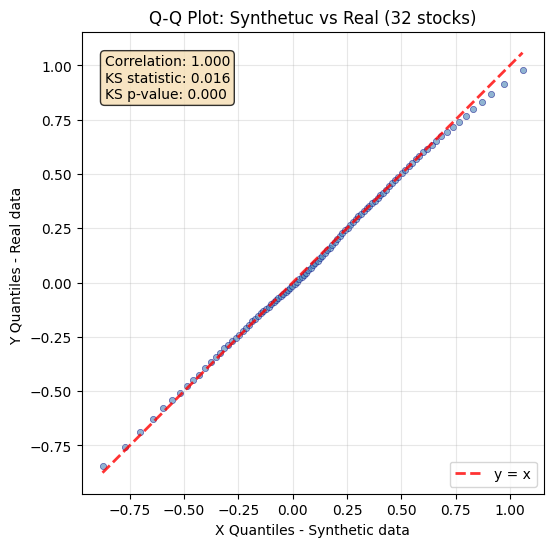

For q=20.0, the optimal variance is 1.0 , and objective function is 629.99,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.99,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.99,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.99,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.99,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.99,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.99,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective functi

100%|██████████████████████████| 2500/2500 [00:19<00:00, 129.07it/s, loss=0.326]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12147.67,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12147.67,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12147.67,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12147.67,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12147.67,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12147.67,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12147.67,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the opt

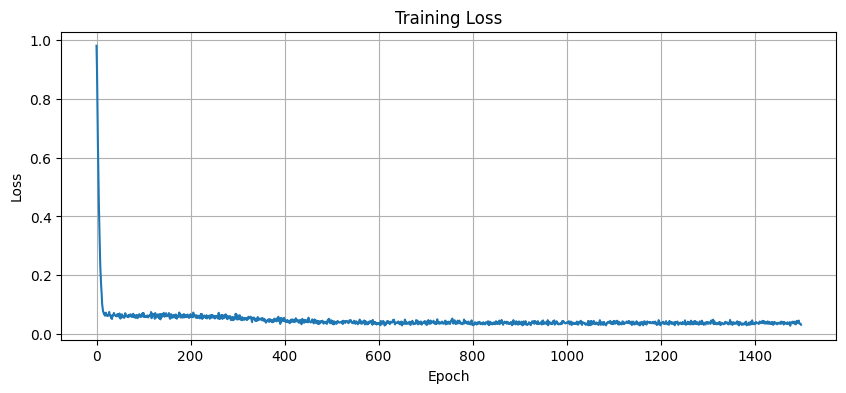


Generating samples...


Sampling: 4000it [00:07, 505.40it/s]


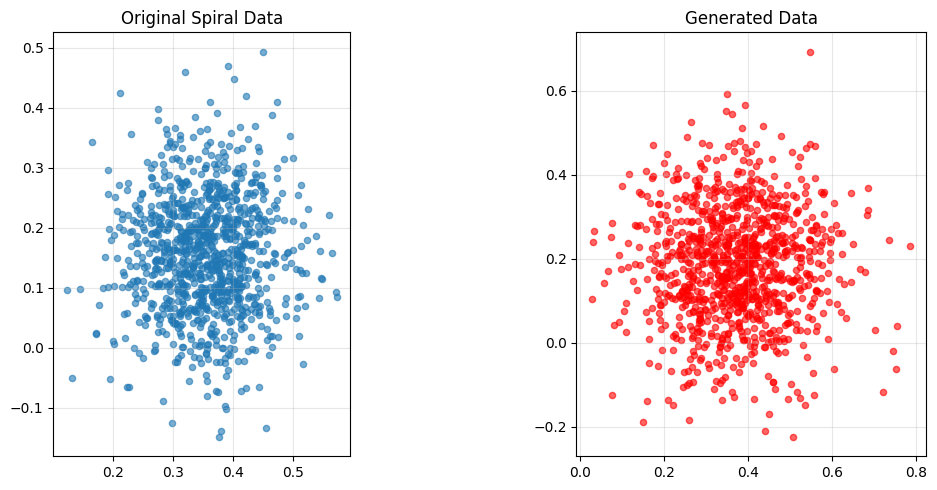


=== Statistics ===
Original - Mean: 0.120, Std: 0.415
Generated - Mean: 0.126, Std: 0.433


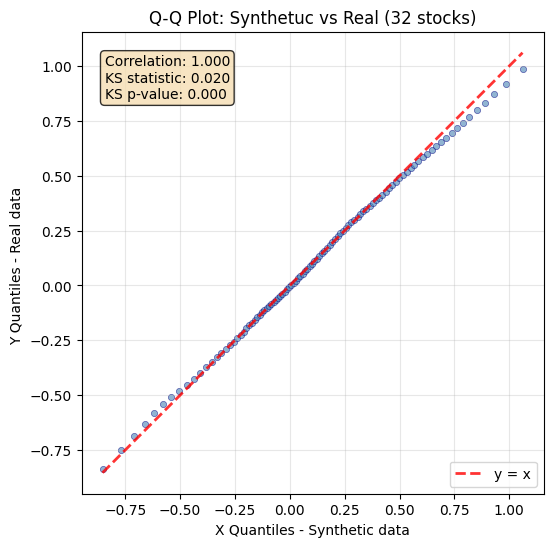

For q=20.0, the optimal variance is 1.0 , and objective function is 649.32,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.32,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.32,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.32,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.32,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.32,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.32,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective functi

100%|██████████████████████████| 2500/2500 [00:18<00:00, 134.40it/s, loss=0.321]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12252.84,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12252.84,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12252.84,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12252.84,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12252.84,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12252.84,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12252.84,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the opt

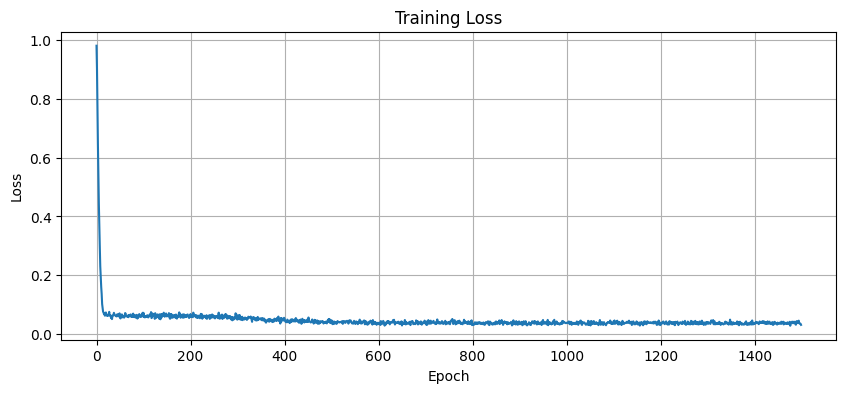


Generating samples...


Sampling: 4000it [00:08, 481.56it/s]


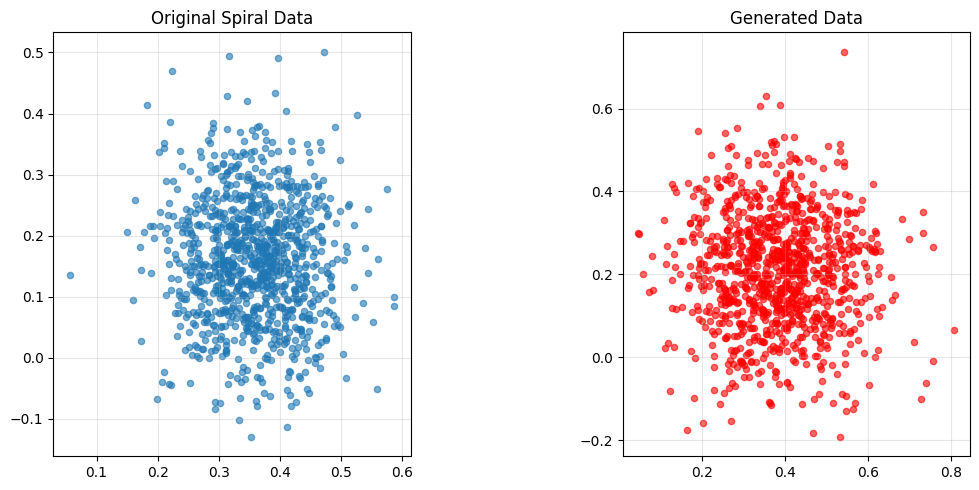


=== Statistics ===
Original - Mean: 0.122, Std: 0.415
Generated - Mean: 0.124, Std: 0.433


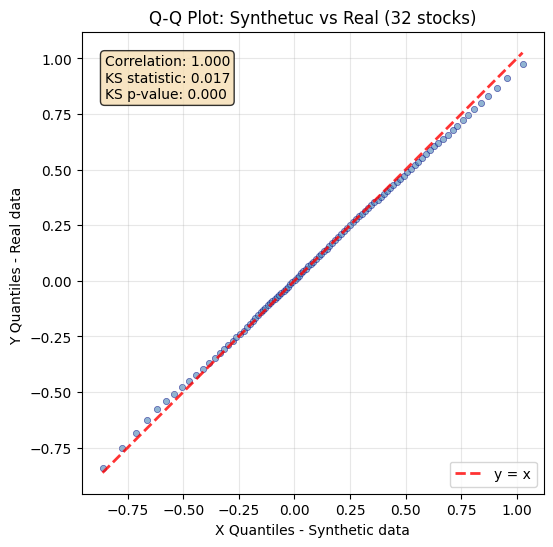

For q=20.0, the optimal variance is 1.0 , and objective function is 648.7,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.7,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.7,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.7,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.7,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.7,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.7,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 6

100%|██████████████████████████| 2500/2500 [00:18<00:00, 135.19it/s, loss=0.297]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12206.38,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12206.38,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12206.38,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12206.38,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12206.38,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12206.38,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12206.38,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the opt

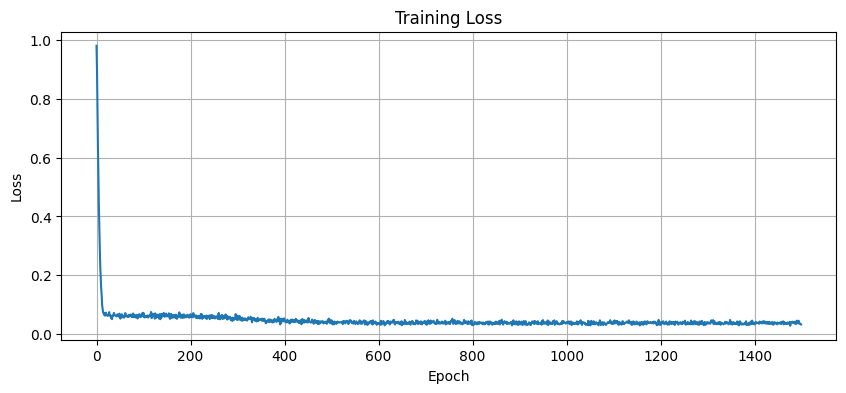


Generating samples...


Sampling: 4000it [00:08, 496.68it/s]


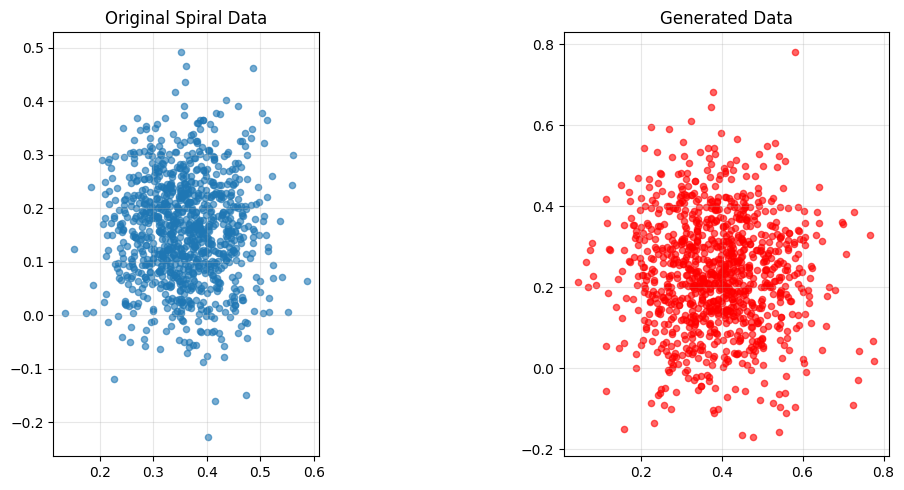


=== Statistics ===
Original - Mean: 0.120, Std: 0.414
Generated - Mean: 0.128, Std: 0.437


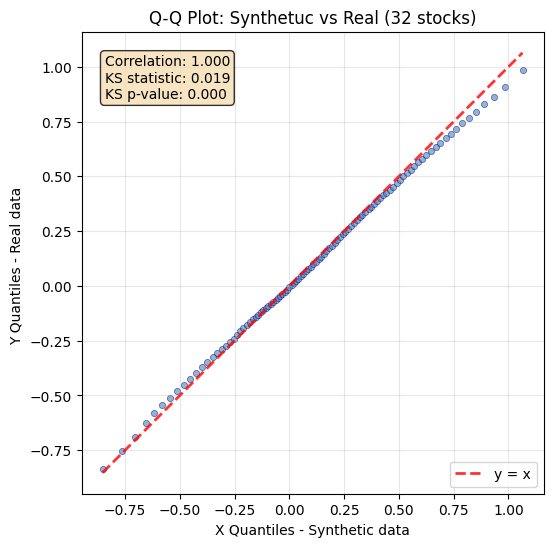

For q=20.0, the optimal variance is 1.0 , and objective function is 649.1,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.1,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.1,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.1,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.1,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.1,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.1,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 6

100%|███████████████████████████| 2500/2500 [00:19<00:00, 131.31it/s, loss=0.29]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12292.4,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12292.4,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12292.4,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12292.4,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12292.4,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12292.4,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12292.4,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal va

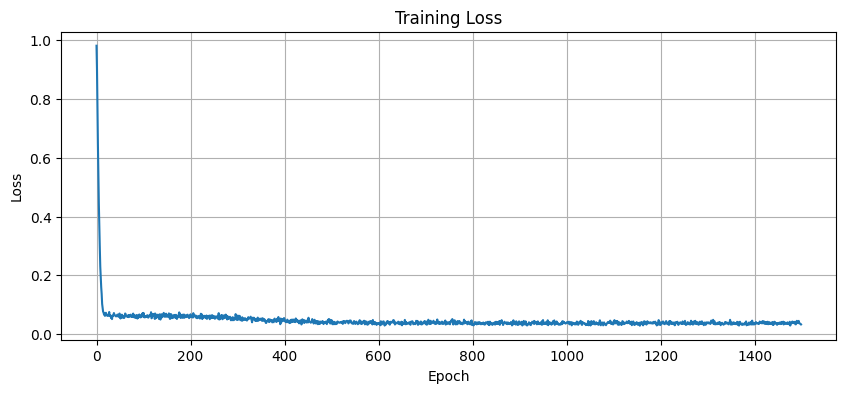


Generating samples...


Sampling: 4000it [00:08, 472.38it/s]


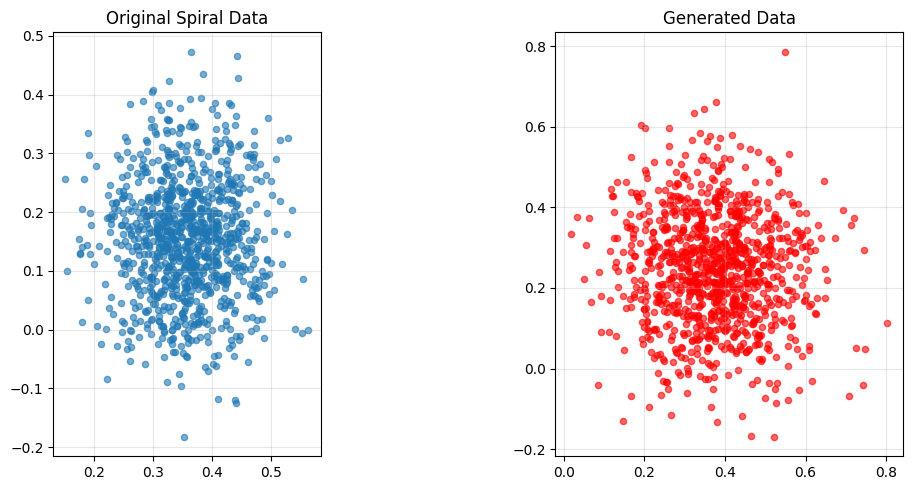


=== Statistics ===
Original - Mean: 0.122, Std: 0.412
Generated - Mean: 0.136, Std: 0.425


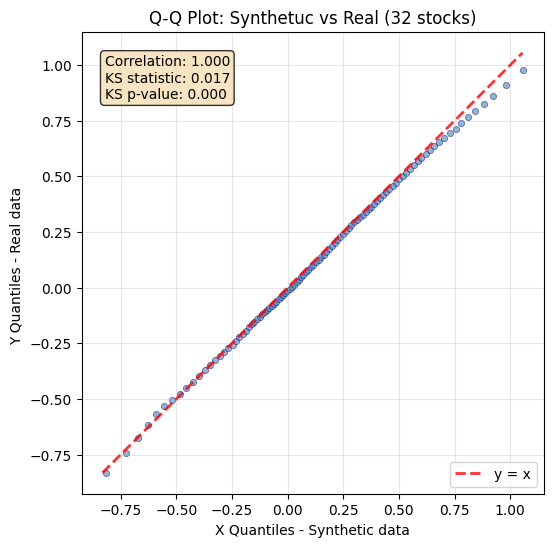

For q=20.0, the optimal variance is 1.0 , and objective function is 648.08,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.08,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.08,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.08,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.08,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.08,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 648.08,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective functi

100%|██████████████████████████| 2500/2500 [00:18<00:00, 132.30it/s, loss=0.302]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12264.78,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12264.78,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12264.78,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12264.78,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12264.78,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12264.78,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12264.78,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the opt

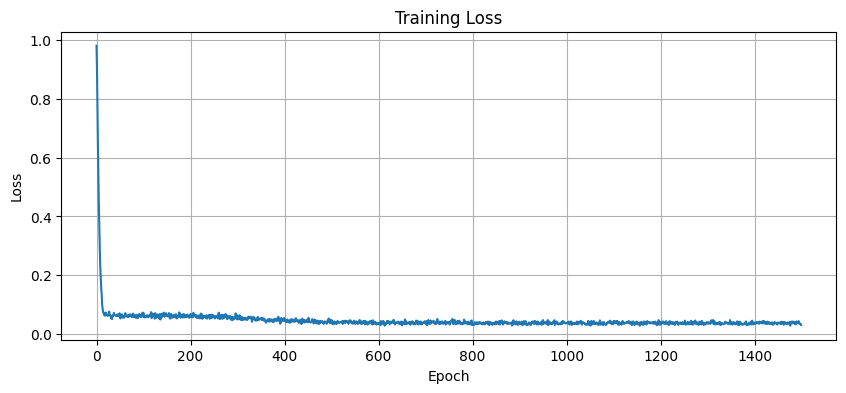


Generating samples...


Sampling: 4000it [00:07, 503.93it/s]


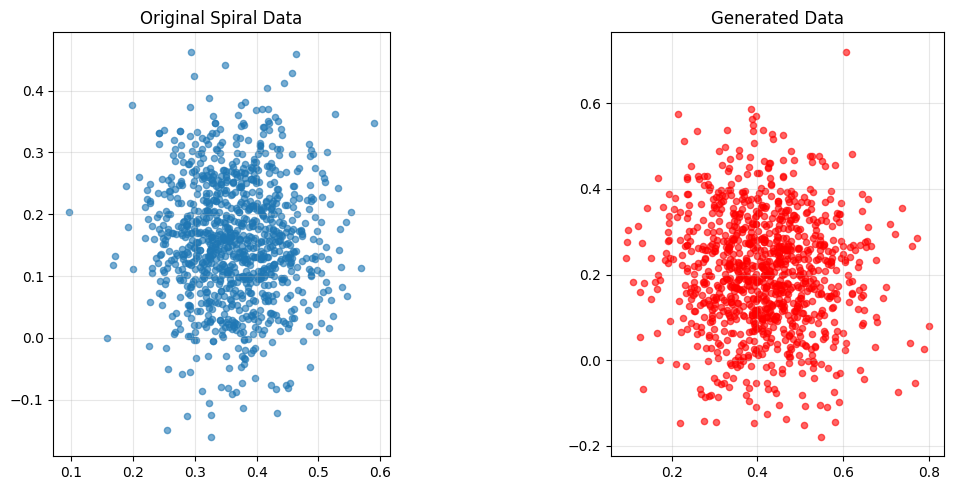


=== Statistics ===
Original - Mean: 0.123, Std: 0.415
Generated - Mean: 0.129, Std: 0.440


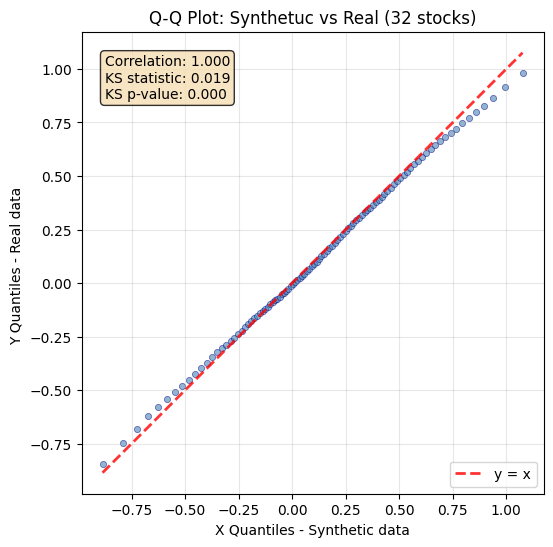

For q=20.0, the optimal variance is 1.0 , and objective function is 649.33,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.33,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.33,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.33,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.33,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.33,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.33,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective functi

100%|██████████████████████████| 2500/2500 [00:19<00:00, 131.36it/s, loss=0.282]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12262.99,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12262.99,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12262.99,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12262.99,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12262.99,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12262.99,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12262.99,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the opt

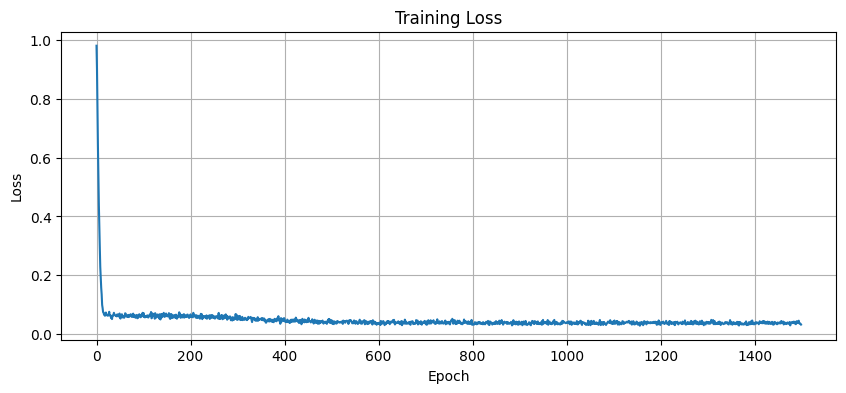


Generating samples...


Sampling: 4000it [00:07, 514.20it/s]


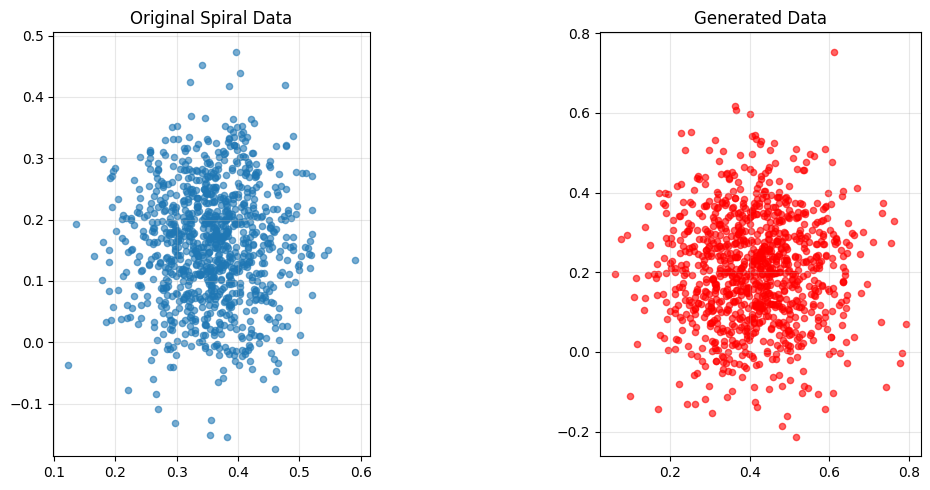


=== Statistics ===
Original - Mean: 0.121, Std: 0.414
Generated - Mean: 0.127, Std: 0.438


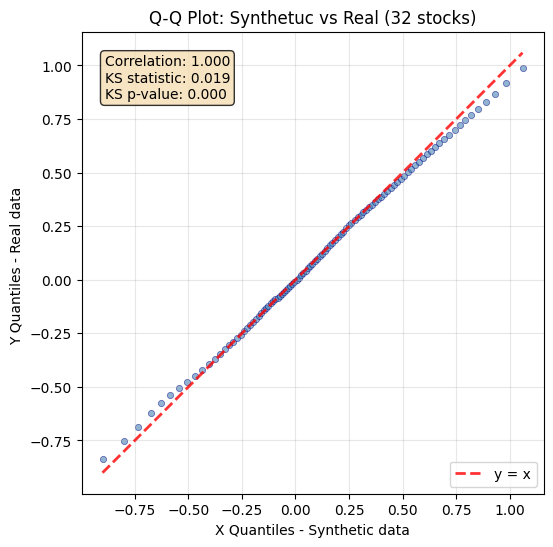

For q=20.0, the optimal variance is 1.0 , and objective function is 650.26,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 650.26,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 650.26,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 650.26,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 650.26,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 650.26,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 650.26,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective functi

100%|██████████████████████████| 2500/2500 [00:18<00:00, 133.58it/s, loss=0.293]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12336.26,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12336.26,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12336.26,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12336.26,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12336.26,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12336.26,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the optimal variance is 1.0 , and objective function is 12336.26,and max random eigen value: 1.15,and # of signal factors: 5
For q=200.0, the opt

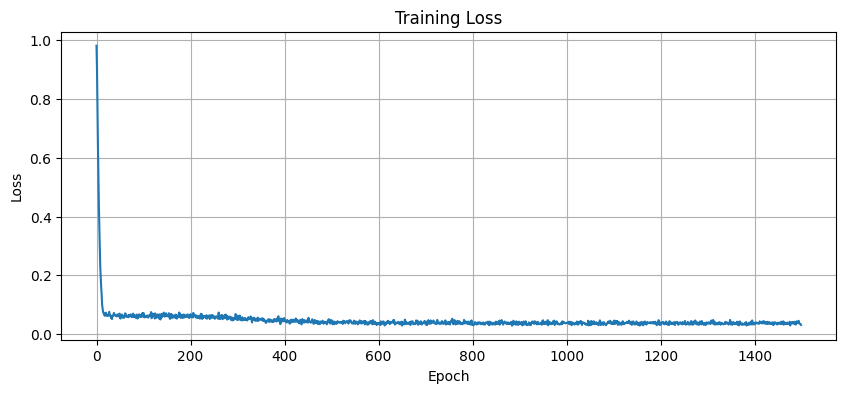


Generating samples...


Sampling: 4000it [00:08, 477.26it/s]


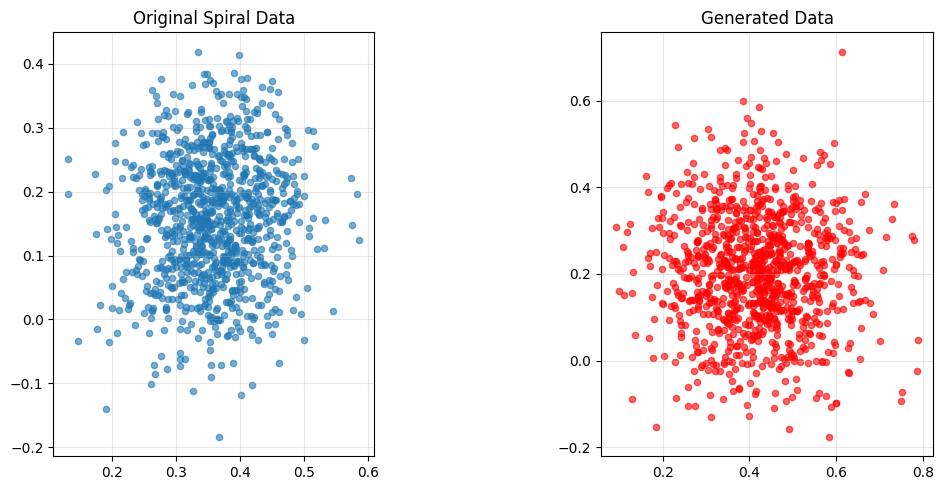


=== Statistics ===
Original - Mean: 0.122, Std: 0.413
Generated - Mean: 0.129, Std: 0.433


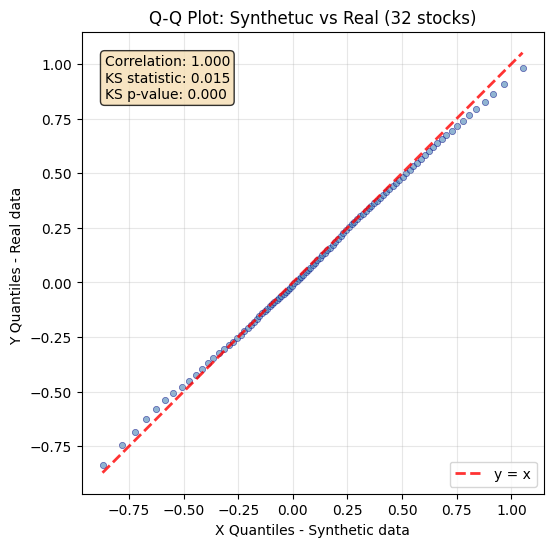

For q=20.0, the optimal variance is 1.0 , and objective function is 647.94,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 647.94,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 647.94,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 647.94,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 647.94,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 647.94,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 647.94,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective functi

100%|███████████████████████████| 2500/2500 [00:18<00:00, 132.39it/s, loss=0.28]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12265.61,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12265.61,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12265.61,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12265.61,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12265.61,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12265.61,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12265.61,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the opt

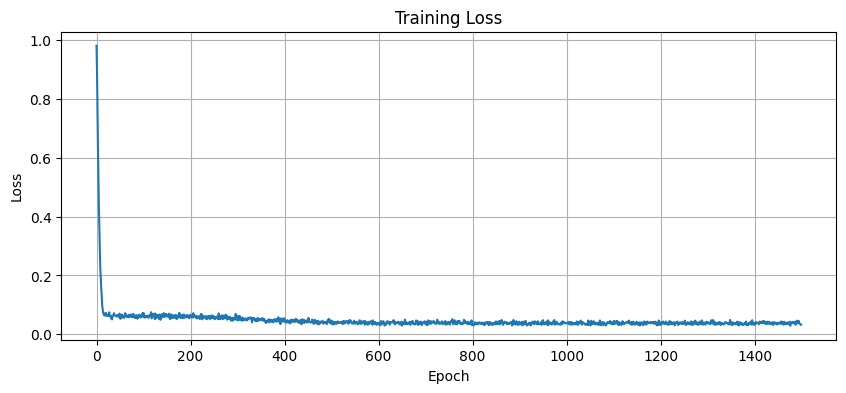


Generating samples...


Sampling: 4000it [00:07, 529.93it/s]


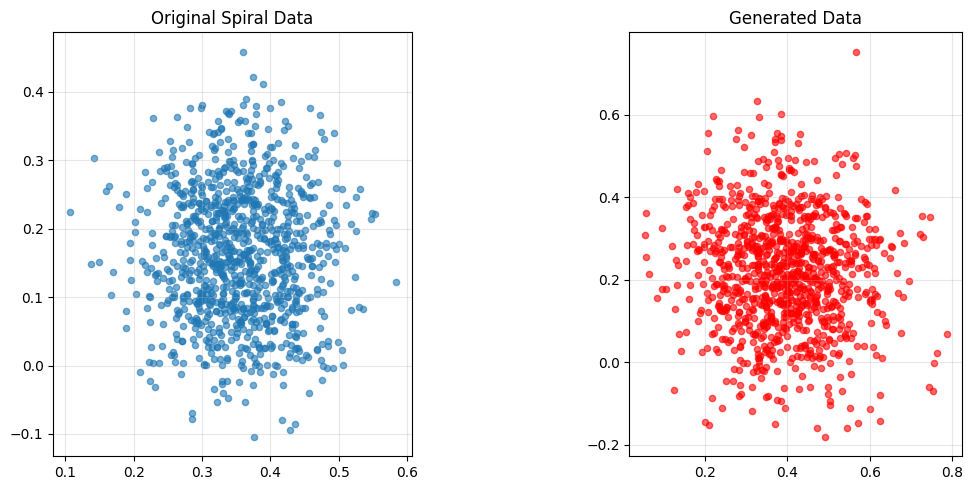


=== Statistics ===
Original - Mean: 0.121, Std: 0.416
Generated - Mean: 0.131, Std: 0.435


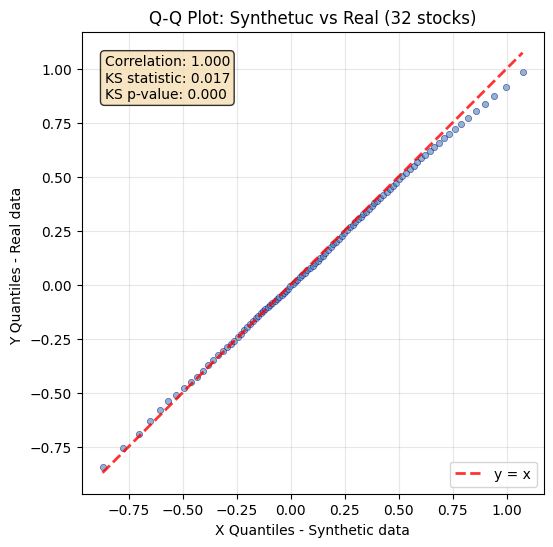

For q=20.0, the optimal variance is 1.0 , and objective function is 629.74,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.74,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.74,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.74,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.74,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.74,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 629.74,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective functi

100%|██████████████████████████| 2500/2500 [00:18<00:00, 133.53it/s, loss=0.283]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12263.6,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12263.6,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12263.6,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12263.6,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12263.6,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12263.6,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal variance is 1.0 , and objective function is 12263.6,and max random eigen value: 1.15,and # of signal factors: 7
For q=200.0, the optimal va

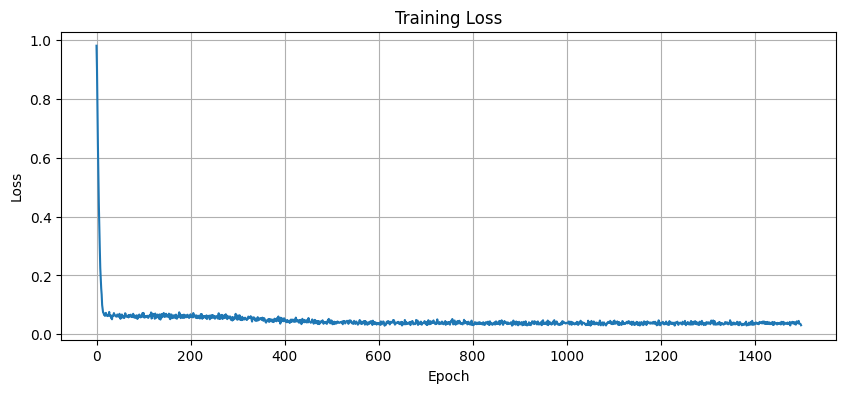


Generating samples...


Sampling: 4000it [00:08, 479.60it/s]


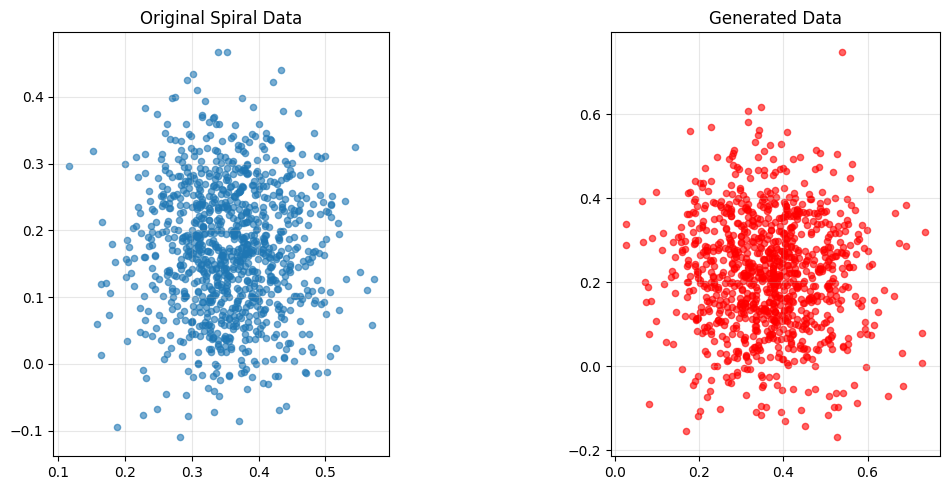


=== Statistics ===
Original - Mean: 0.124, Std: 0.413
Generated - Mean: 0.117, Std: 0.428


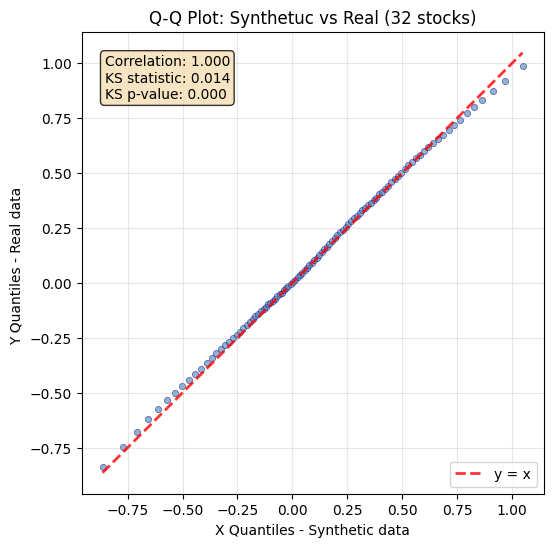

For q=20.0, the optimal variance is 1.0 , and objective function is 649.14,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.14,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.14,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.14,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.14,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.14,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective function is 649.14,and max random eigen value: 1.5,and # of signal factors: 5
For q=20.0, the optimal variance is 1.0 , and objective functi

100%|██████████████████████████| 2500/2500 [00:19<00:00, 130.18it/s, loss=0.298]


Done Sampling
For q=200.0, the optimal variance is 1.0 , and objective function is 12220.92,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12220.92,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12220.92,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12220.92,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12220.92,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12220.92,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the optimal variance is 1.0 , and objective function is 12220.92,and max random eigen value: 1.15,and # of signal factors: 6
For q=200.0, the opt

In [19]:
for i in range(number_simulations):
    data, sample_mu, sample_covariance =simulate_covariance_mean(true_mu=true_mu,
                                                         true_covariance = true_covariance ,
                                                         number_of_observations = number_observations,
                                                         shrink =shrink  )
    data = data.astype(np.float32)  

    # Initialize model and DDPM
    model = ScoreNet(input_dim=50, hidden_dim=256, time_dim=64).to(device)
    ddmp = DDPM(timesteps=4000)
    
    print(f"Model has {sum(p.numel() for p in model.parameters())} parameters")
    
    # Train model
    print("\nTraining DDPM...")
    losses = train_ddpm(
        model=model,
        data= data,
        ddpm=ddmp,
        epochs=1500,
        batch_size=128,
        lr=1e-3
    )
    # Plot training loss
    plt.figure(figsize=(10, 4))
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.grid(True)
    plt.show()
    plt.close()
    # Generate samples
    print("\nGenerating samples...")
    n_generate = 1000
    generated_samples = ddmp.sample(model, n_generate,input_dim=50).cpu().numpy()
    # Visualize results
    plot_results(data[:n_generate], generated_samples)
    # Print statistics
    print("\n=== Statistics ===")
    print(f"Original - Mean: {data.mean():.3f}, Std: {data.std():.3f}")
    print(f"Generated - Mean: {generated_samples.mean():.3f}, Std: {generated_samples.std():.3f}")
    

    

    # Flatten the arrays (concatenate all columns)
    synthetic_flat = generated_samples.flatten()
    real_flat = data.flatten()
    
    _=qqplot(x=synthetic_flat , 
             y=real_flat,
            title  = 'Q-Q Plot: Synthetuc vs Real (32 stocks)',
        xlabel  = 'X Quantiles - Synthetic data',
        ylabel  = 'Y Quantiles - Real data ',)
    plt.show()
    plt.close()
    simulated_data_cov_cond_number.append(np.linalg.cond(pd.DataFrame(data).cov()))
    generated_data_cov_cond_number.append(np.linalg.cond(pd.DataFrame(generated_samples).cov()))
    maxsharpe_markowitz_weights = get_maximum_sharpe_portfolio_weights(
                                                                   pd.DataFrame(generated_samples).cov(), 
                                                                   pd.DataFrame(generated_samples).mean(axis=0)
                                                                  
                                                                  ).flatten()
    generated_data_error.append(np.sqrt(np.mean((maxsharpe_true_w-maxsharpe_markowitz_weights)**2)))
    std = np.array(data).std(axis=0)
    q = round(data.shape[0]/data.shape[1])
        
    matrix_cleanser = CleanseMatrix(   use_shrinkage = False,
                                     shrinkage_regularizer = False,
                                     detone = False,
                                     market_components_max_index = 1,
                                                   cv=5,
                               min_q = q,
    max_q = q )
    matrix_cleanser.fit(pd.DataFrame(data).corr())
    
    # mp_cond_number.append(np.linalg.cond(matrix_cleanser.cleansed_matrix))
    std = np.array(data).std(axis=0)
    mp_cond_number.append(np.linalg.cond(correlation2covariance(correlation_matrix=matrix_cleanser.cleansed_matrix,
                       std = std)) )
    mp_maxsharpe_markowitz_weights = get_maximum_sharpe_portfolio_weights(
                                                                 correlation2covariance(correlation_matrix=matrix_cleanser.cleansed_matrix,
                       std = std),
                                                                   pd.DataFrame(data).mean(axis=0)
                                                                  
                                                                  ).flatten()
    mp_error.append(np.sqrt(np.mean((maxsharpe_true_w- mp_maxsharpe_markowitz_weights)**2)))

    
    ddpm_q = round(generated_samples.shape[0]/generated_samples.shape[1])
    ddpm_matrix_cleanser = CleanseMatrix(   use_shrinkage = False,
                                     shrinkage_regularizer = False,
                                     detone = False,
                                     market_components_max_index = 1,
                                                   cv=5,
                                                    min_q = ddpm_q,
                                                    max_q = ddpm_q )
    ddpm_matrix_cleanser.fit(pd.DataFrame(generated_samples).corr())
    ddpm_std = np.array(generated_samples).std(axis=0)
    ddpm_mp_covariance = correlation2covariance(correlation_matrix=ddpm_matrix_cleanser.cleansed_matrix,std = ddpm_std)
    ddpm_mp_generated_data_cov_cond_number.append(np.linalg.cond(ddpm_mp_covariance))
    
    
    ddpm_mp_maxsharpe_markowitz_weights = get_maximum_sharpe_portfolio_weights(
                                                                   ddpm_mp_covariance, 
                                                                   pd.DataFrame(generated_samples).mean(axis=0)
                                                                  
                                                                  ).flatten()
    ddpm_mp_generated_data_error.append(np.sqrt(np.mean((maxsharpe_true_w-ddpm_mp_maxsharpe_markowitz_weights)**2)))

    
    pt_data = torch.tensor(np.array(data), dtype = torch.float32)
    flow_matching_model = FlowMatchingModel(layers=5, 
                                            channels_data=50,
                                           lr=0.001)
    flow_matching_model.train_model(pt_data, training_steps=2500) 
    flow_matching_samples = flow_matching_model.sample(num_samples=10000)
    fm_generated_data_cov_cond_number.append(np.linalg.cond(pd.DataFrame(flow_matching_samples).cov()))
    fm_q = round(flow_matching_samples.shape[0]/flow_matching_samples.shape[1])
    fm_matrix_cleanser = CleanseMatrix(   use_shrinkage = False,
                                     shrinkage_regularizer = False,
                                     detone = False,
                                     market_components_max_index = 1,
                                                   cv=5,
                                                    min_q = fm_q,
                                                    max_q = fm_q )
    fm_matrix_cleanser.fit(pd.DataFrame(flow_matching_samples).corr())
    fm_std = np.array(flow_matching_samples).std(axis=0)
    fm_mp_covariance = correlation2covariance(correlation_matrix=fm_matrix_cleanser.cleansed_matrix,std = fm_std)
    fm_mp_generated_data_cov_cond_number.append(np.linalg.cond(fm_mp_covariance))
    fm_maxsharpe_markowitz_weights = get_maximum_sharpe_portfolio_weights(
                                                                   pd.DataFrame(flow_matching_samples).cov(), 
                                                                   pd.DataFrame(flow_matching_samples).mean(axis=0)
                                                                  
                                                                  ).flatten()
    fm_mp_maxsharpe_markowitz_weights = get_maximum_sharpe_portfolio_weights(
                                                                   fm_mp_covariance, 
                                                                   pd.DataFrame(flow_matching_samples).mean(axis=0)
                                                                  
                                                                  ).flatten()
    fm_generated_data_error.append(np.sqrt(np.mean((maxsharpe_true_w-fm_maxsharpe_markowitz_weights)**2)))
    fm_mp_generated_data_error.append(np.sqrt(np.mean((maxsharpe_true_w-fm_mp_maxsharpe_markowitz_weights)**2)))


    


    


In [20]:
generated_samples.shape

(1000, 50)

In [21]:
flow_matching_samples.shape

torch.Size([10000, 50])

In [22]:
pd.Series(simulated_data_cov_cond_number ).describe()

count    10.000000
mean     43.237322
std       1.979767
min      41.551581
25%      41.865635
50%      42.507964
75%      44.223744
max      47.930936
dtype: float64

In [23]:
pd.Series(mp_cond_number).describe()

count    10.000000
mean     40.198135
std       1.533229
min      38.352925
25%      39.154509
50%      39.690219
75%      40.969645
max      43.374054
dtype: float64

In [24]:
pd.Series(generated_data_cov_cond_number).describe()

count    10.000000
mean      9.519374
std       1.158293
min       7.464786
25%       8.783008
50%       9.433270
75%      10.336674
max      11.131461
dtype: float64

In [25]:
pd.Series(ddpm_mp_generated_data_cov_cond_number).describe()

count    10.000000
mean      6.526186
std       0.604850
min       5.206969
25%       6.335219
50%       6.710268
75%       6.820729
max       7.370142
dtype: float64

In [26]:
pd.Series(fm_generated_data_cov_cond_number).describe()

count     10.000000
mean      97.757872
std        9.480079
min       86.450649
25%       92.713378
50%       96.215336
75%      100.204909
max      114.705003
dtype: float64

In [27]:
pd.Series(fm_mp_generated_data_cov_cond_number).describe()

count     10.000000
mean      80.495191
std       11.597773
min       69.657717
25%       72.265027
50%       76.684766
75%       86.909423
max      105.100167
dtype: float64

In [28]:
pd.Series(mp_error).describe()

count    10.000000
mean      0.867928
std       0.172353
min       0.649957
25%       0.728341
50%       0.859639
75%       0.996173
max       1.137157
dtype: float64

In [29]:
pd.Series(generated_data_error).describe()

count    10.000000
mean      0.569543
std       0.004848
min       0.563749
25%       0.565346
50%       0.569594
75%       0.571980
max       0.578046
dtype: float64

In [30]:
pd.Series(ddpm_mp_generated_data_error).describe()

count    10.000000
mean      0.569379
std       0.005301
min       0.562331
25%       0.566317
50%       0.568090
75%       0.571192
max       0.581196
dtype: float64

In [31]:
pd.Series(fm_generated_data_error).describe()

count    10.000000
mean      0.753643
std       0.416957
min       0.566289
25%       0.580149
50%       0.590408
75%       0.687173
max       1.921844
dtype: float64

In [32]:
pd.Series(fm_mp_generated_data_error).describe()

count    10.000000
mean      0.629596
std       0.079972
min       0.560960
25%       0.573304
50%       0.586826
75%       0.664276
max       0.802758
dtype: float64